<a href="https://colab.research.google.com/github/cat-mb/Cat-s-Portfolio/blob/main/bananas_revisited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [875. bananas](https://leetcode.com/problems/koko-eating-bananas/)


### *Description*

Koko loves to eat bananas. There are `n` piles of bananas, the `ith` pile has `piles[i]` bananas. The guards have gone and will come back in `h` hours.

Koko can decide her bananas-per-hour eating speed of `k`. Each hour, she chooses some pile of bananas and eats `k` bananas from that pile. If the pile has less than `k` bananas, she eats all of them instead and will not eat any more bananas during this hour.

Koko likes to eat slowly but still wants to finish eating all the bananas before the guards return.

Return the minimum integer `k` such that she can eat all the bananas within `h` hours.

### *Overview*

Koko is given `n` piles of bananas, represented by an integer array of length `n`. She eats bananas at a constant speed, for example, *x* bananas per hour. The time taken to eat a pile of *y* bananas is *y/x* after rounding up to the closest integer. For example, if she eats 3 bananas per hour, it takes her 2 hours to eat a pile of 4 bananas.

The first constraint of the problem is that Koko has to eat all the piles within `h` hours, where `h` is no less than the number of piles. We can imagine that with a fast speed, Koko spends 1 hour on each pile, therefore, she would always finish all the piles within `h` hours. Let's call this a **workable speed**. Likewise, let any eating speed at which Koko can't eat all the piles be **unworkable speed**.

However, we have another constraint that Koko would like to eat as slow as possible, therefore, among all the workable eating speeds, we need to find out the minimum one.

### *Intuitive first approach*

The brute force approach is to try every possible eating speed to find the smallest workable speed. Starting from `speed=1` and incrementing it by 1 each time, we will find a speed at which Koko can eat all piles within `h` hours, that is, the first minimum speed.

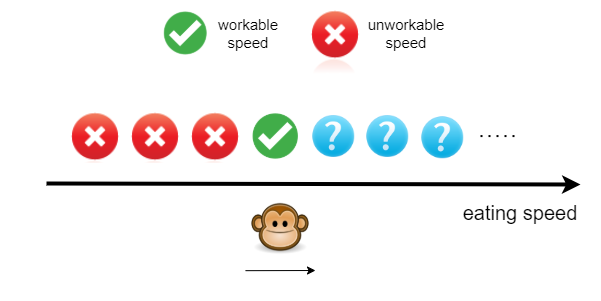

https://leetcode.com/problems/koko-eating-bananas/editorial/


In [8]:
# implement the brute force approach to solving Koko's problem
# by replacing each ... with a single line of code

def minEatingSpeed1(piles: list[int], h: int) -> int:
        #Start at an eating speed of 1.
        speed = 1
        ...

        while True:
            # hour_spent stands for the total hour Koko spends with
            # the given eating speed.
            hour_spent = 0
            ...


            # Iterate over the piles and calculate hour_spent.
            # We increase the hour_spent by ceil(pile / speed)
            for pile in piles:
              hour_spent += ceil((pile / speed))

            # Check if Koko can finish all the piles within h hours,
            # If so, return speed. Otherwise, let speed increment by
            # 1 and repeat the previous iteration.
            if hour_spent <= h:
                return speed

            else:
              speed += 1


### *Improved approach using binary search*

In the previous approach, we tried every smaller eating speed, before finding the first workable speed. We shall look for a more efficient way to locate the minimum workable eating speed.

Recall how we calculated the total time for Koko to finish eating all the piles in the brute force approach. We can make a few important observations:

- If Koko can eat all the piles with a speed of n, she can also finish the task with the speed of n+1.

- If Koko can't finish with a speed of n, then she can't finish with the speed of n−1 either.

If the current speed is workable, the minimum workable speed should be on its left inclusively. If the current speed is not workable, that is, too slow to finish the eating task, then the minimum workable speed should be on its right exclusively.

Therefore, we can use **binary search** to locate the boundary that separates workable speeds and unworkable speeds, to get the minimum workable speed.

First, let's set a reasonable upper and lower bound for binary search (to ensure that we do not miss any workable speed). Let the lower bound be 1, the minimum possible eating speed since there is no speed slower than 1. The upper bound will be the maximum eating speed, that is the maximum number of bananas in a pile. For instance, if the piles are `[3,5,7,9]`, then 9 is the maximum number of bananas in a single pile, we can set the upper boundary as 9. Because Koko can eat every pile within 1 hour with a speed of 9, or any other faster speed, 9 is thus guaranteed to be a workable value.

Once we set the boundaries, we can then apply the binary search to reduce the search space. In each iteration, we will reduce the remaining search space by half until we have narrowed down the search space to just one element, which is the minimum workable eating speed!

In [13]:
class Solution:
     def minEatingSpeed2(self, piles: list[int], h: int) -> int:
        # Initalize the left and right boundaries
        left = 1
        right = max(piles)

        while left < right:
            # Get the middle index between left and right boundary indexes.
            # hour_spent stands for the total hour Koko spends.
            middle = (left + right) // 2
            hour_spent = 0

            # Iterate over the piles and calculate hour_spent.
            # We increase the hour_spent by ceil(pile / middle)
            for pile in piles:
                hour_spent += ceil(pile / middle)

            # Check if middle is a workable speed, and cut the search space by half.
            if hour_spent <= h:
                right = middle
            else:
                left = middle + 1

        # Once the left and right boundaries coincide, we find the target value,
        # that is, the minimum workable eating speed.
        return right

## Correctness checks

1. Given the problem's example input and outputs, write `assert` statements to make sure both approaches solve the problem correctly.

2. Can you think of any other *edge cases* to test? Assert their correctness too.

**Example 1:**

```
Input: piles = [3,6,7,11], h = 8
Output: 4
```

**Example 2:**

```
Input: piles = [30,11,23,4,20], h = 5
Output: 30
```

**Example 3:**

```
Input: piles = [30,11,23,4,20], h = 6
Output: 23
```



SyntaxError: ignored

## Performance analysis

Given the problem's input constraints, use Python's time module to see how much of a difference the more efficient binary search approach makes and when it starts to be noticable.

**Constraints:**

* `1 <= piles.length <= 10^4`
* `piles.length <= h <= 10^9`
* `1 <= piles[i] <= 10^9`


In [5]:
import time

*edit this text cell to describe your findings & then add a sharable link to the notebook to your portfolio 📓*